In [1]:
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")
# setup disply parameters
from matplotlib import pylab as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

float_formatter = StrMethodFormatter("{x:0.03f}")
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("figure", figsize=(18, 6))  # set figure size
plt.rc("animation", html="html5")
import random

random.seed(203)
import numpy as np

np.random.seed(345)
import matplotlib.pyplot as plt
from rich import print
from pathlib import Path

# Visualizing a negotiation

*The corresponding code for the tutorials can be found in the [ANL2025 Drive](https://drive.google.com/drive/folders/1xc5qt7XlZQQv6q1NVnu2vP6Ou-YOQUms?usp=drive_link) or at the ANL2025 Github repository.*

In the previous tutorial, you have seen how to run a negotiation using `run_session()`. By default, this function logs and outputs graphs in the folder **...\negmas\anl2025\session**. In this tutorial, we will show you how to output these graphs yourself, and take you step by step through the graphs and explain what they mean.



In [18]:
from anl2025 import load_example_scenario, run_session
from anl2025.negotiator import Boulware2025, Random2025, Linear2025

scenario = load_example_scenario("TargetQuantity")

centeragent = Boulware2025
edgeagents = [Random2025, Random2025, Linear2025, Boulware2025]
results = run_session(
    scenario=scenario,
    center_type=centeragent,
    edge_types=edgeagents,  # type: ignore
    nsteps=10,
)

Recall what the example scenario `Target_quantity` entails: A buyer wants to acquire a total of 10 from 4 different sellers. The buyer (center agent) preferably buys quantity 10: Everything above or below 10 gradually decreases utility, where 0 and 20 associate with utility 0. Each seller sells up to 5 units, with a peak preference of 4. For more explanation of the specific scenario, read the call for participation in the [ANL2025 drive](tinyurl.com/ANLdocs).

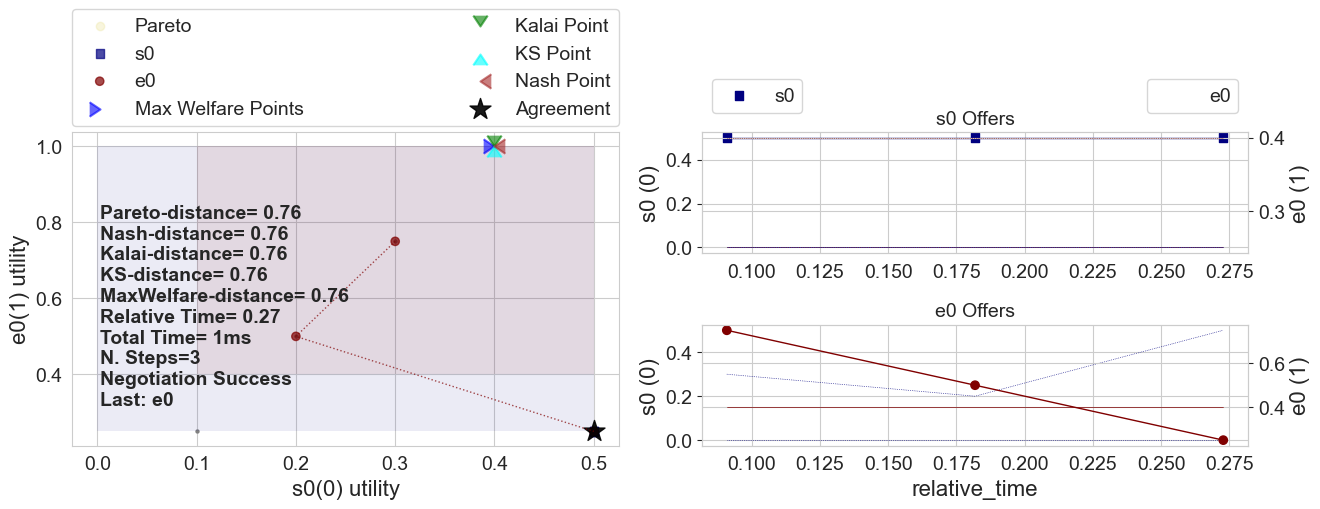

In [20]:
import matplotlib.pyplot as plt


def plot_result(m):
    m.plot(save_fig=False)
    plt.show()
    plt.close()


m = results.mechanisms[0]  # 0 is the index of the first negotiation
plot_result(m)


The variable `results` contains a lot of information. One of the attributes contains all the `mechanisms` of the negotiations that took place. `Mechanism` can information about the negotiation, such as the agreement, the utility of the agents, and the time it took to reach an agreement. Mechanism has a predefined function to plot the negotiation. Let's see what the first negotiation in the sequence looks like. **Note that run_session automatically outputs these graphs in the folder ...\negmas\anl2025\session**.

The output that we see is a visualization of the first subnegotiation, between the centeragent and edge agent `e0`. On the left, we see a graph with the utility of the edge agent on the y-axis, and the utility of the center agent on the x-axis. The dots show bids that were posed by one or the other. Note that we don't see *what* they bid, but how much *utility* it was worth for both. We can see a bid (0.1, 0) at the bottom (0.1 for the center agent and 0 for the edge agent), (0.4, 1.0) at the top (that corresponds with 4 units), and at the right bottom (0.5, 0). There is a black star there, portraying that that bid was the agreement of the negotiation.

On the right, we can see what bids were posed over time, again showing the corresponding utility for both agents on the y-axis.

So, the utility of the first negotiation was 0.5 for the center agent and 0 for the edge agent. What values were agreed upon? We can request that directly:

In [21]:
print(results.agreements[0])

('5',)

Let's continue to the output of the second subnegotiation: the negotiation is between the center agent and edge agent `e1`. The negotiation is similar to the first negotiation; however, the center agent already has an agreement from the first subnegotiation. The graphs that shows the utility of center agent takes into account what previous agreements were made. It shows what a bid was worth, assuming the agreement of previous subnegotiations, and assuming all future negotiations go wrong and find no bid at all.

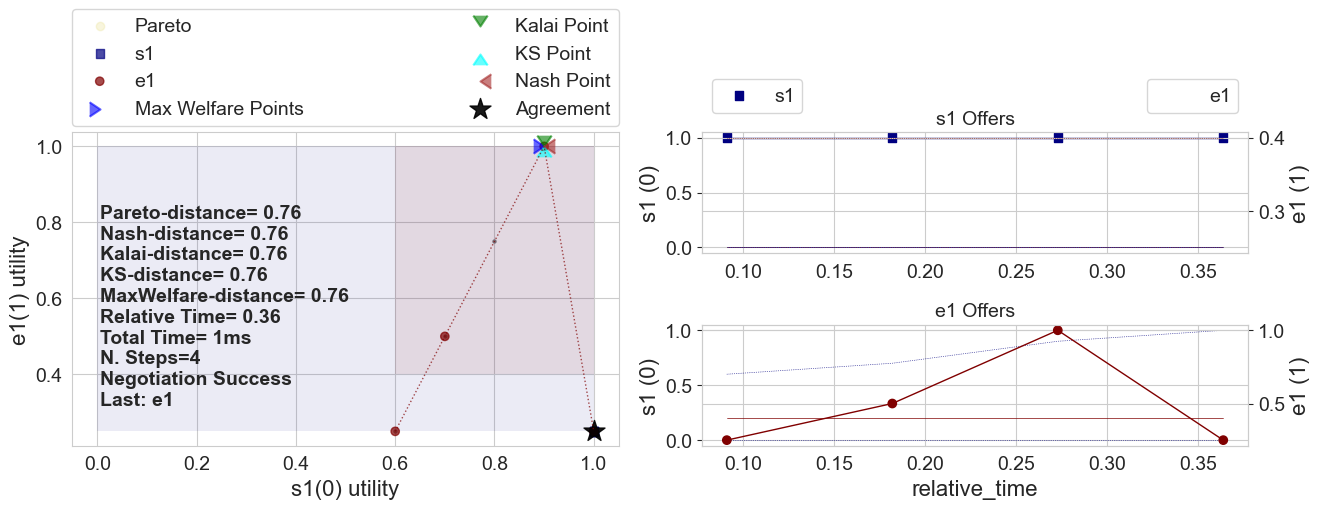

In [22]:
m = results.mechanisms[1]  # 0 is the index of the first negotiation
plot_result(m)

We can see that the x-axis of the center agent has shifted, as the agent already found `5`. The center agent tries to get a quantity of 10, with utility 1.0, by searching for another `5`. And it succeeds!

However, this agent is not very smart. You and I both know we should stop negotiating now, as we got the highest possible. However, this agent continues in the next subnegotiations, decreasing its own utility, finding another `2` and `3` units.

In [23]:
print(results.agreements)

[('5',), ('5',), ('2',), ('3',)]

The same is apparent in the last graphs of the negotiations:

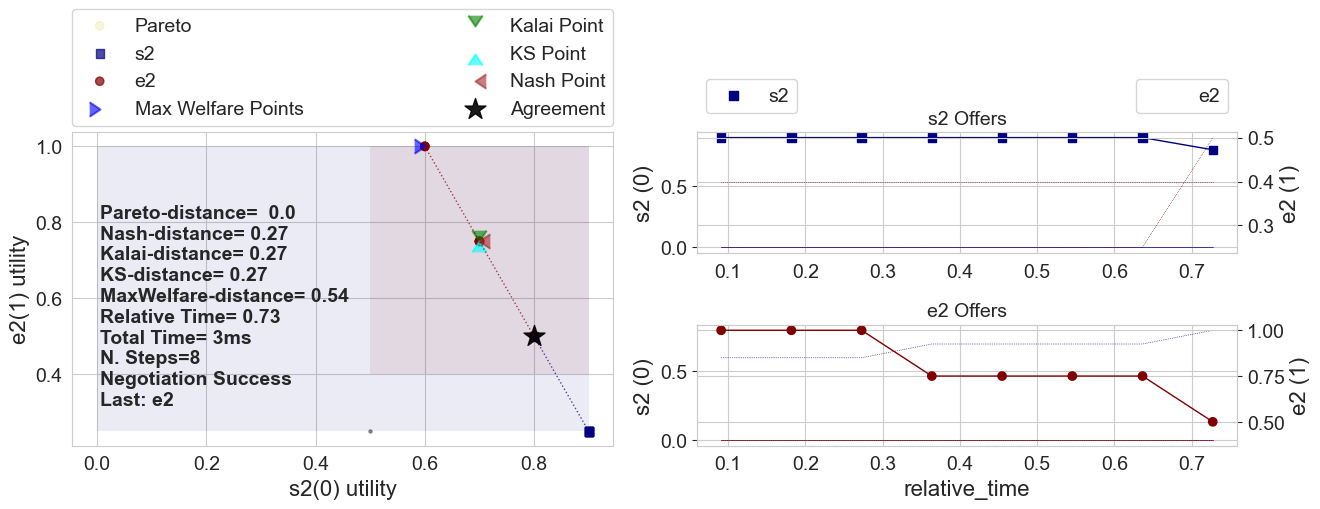

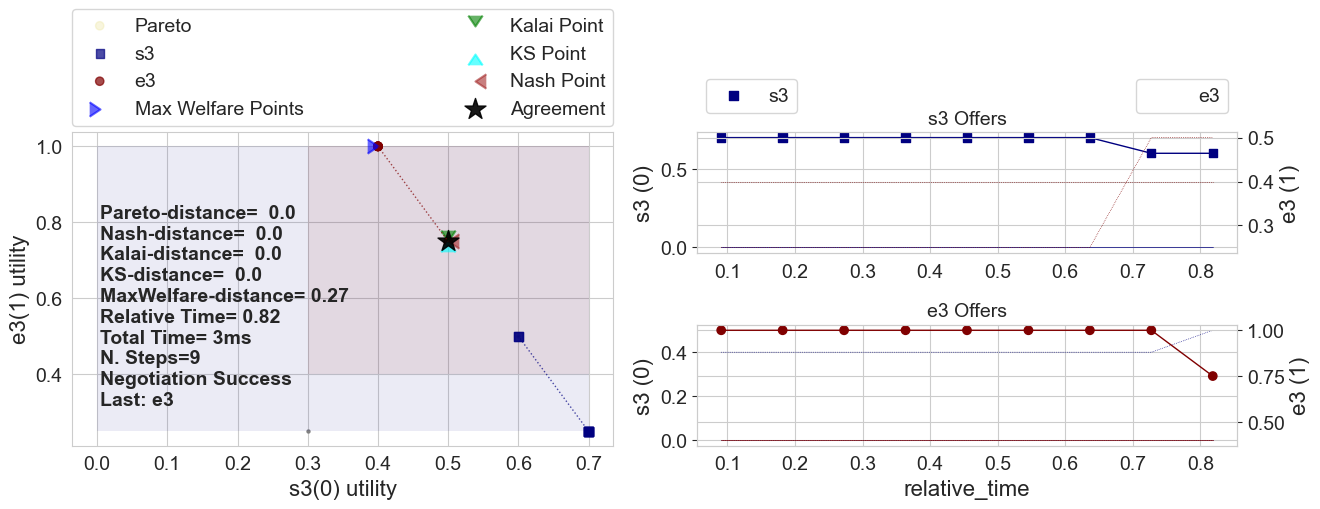

In [24]:
m = results.mechanisms[2]
plot_result(m)
m = results.mechanisms[3]
plot_result(m)

You can probably do better! Also the agents playing as edge agents could learn a lot: agreeing with a utility of 0 is dumb, irrational even. Try to implement a smarter agent and see if you can get a higher utility. The template agent available in the [ANL2025 drive](tinyurl.com/ANLdocs) is a good starting point. Good luck!